### 데이터 수집 및 탐색

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 상관계수 히트맵으로 시각화
import seaborn as sns

In [16]:
## 폰트 설정
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

#폰트 적용
# Set font family globally
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

# 한글 표시를 위해 폰트 지정 필수
# 기본 폰트 적용은 rcParams 설정으로
# - font.family : 기본 폰트 종류 적용
# - axes.unicode_minus : False로 설정 시 마이너스 기호로 ASCII로 한다.

mpl.rcParams["font.family"] = 'NanumGothic'
mpl.rcParams["axes.unicode_minus"] = False

plt.rcParams['axes.unicode_minus'] = False    # 마이너스 깨짐 방지


SeoulNamsan
NanumGothic
['NanumGothic']


In [17]:
def get_score(y_test, y_pred):
    """
    mse,rmse,r2 계산
    """
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    return (mse,rmse,r2)

<img src='./cali_house_features.png' width='450' height='450'/>

In [21]:
# 데이터 수집 및 탐색
from sklearn import datasets
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [22]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [28]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [31]:
housing_df = pd.DataFrame(housing.data,columns=housing.feature_names)
housing_df

# housing_df 에 타킷열을 추가하고 데이터를 입력하시오
housing_df['Price'] = housing.target

In [32]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
# 기초 통계량 확인
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


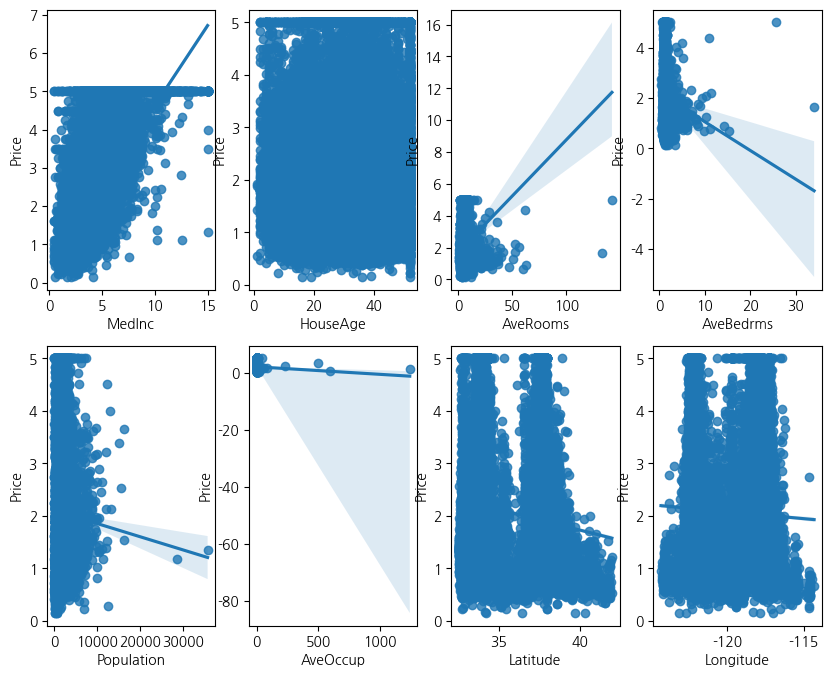

In [34]:
# 종속(price) 변수 vs 독립변수(8개) 관계 시각화 탐색
# 2행 4여로 서브플랏 구조화

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8),nrows=2,ncols=4)

x_features = housing.feature_names

for i, feature in enumerate(x_features) : 
    row = int( i /4 )
    col = i % 4
    sns.regplot(x=feature, y='Price', data=housing_df,ax=ax[row][col])

In [35]:
# 독립변수 간 상관관계 확인

housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

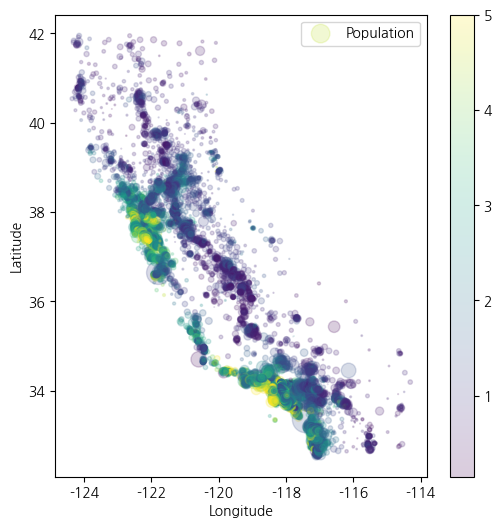

In [40]:
# 위경도 데이터 시각화
#housing_df.plot(kind='scatter',x='Longitude',y='Latitude',alpha=0.2)
#plt.figure(figsize=(10,12))
# 위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게 사용
housing_df.plot(kind = 'scatter' , x='Longitude', y='Latitude', alpha = 0.2,
                s = housing_df ["Population"]/100,
                c = housing_df ['Price'], cmap=plt.get_cmap('viridis'),
                figsize=(6,6),
                label="Population")

<AxesSubplot: >

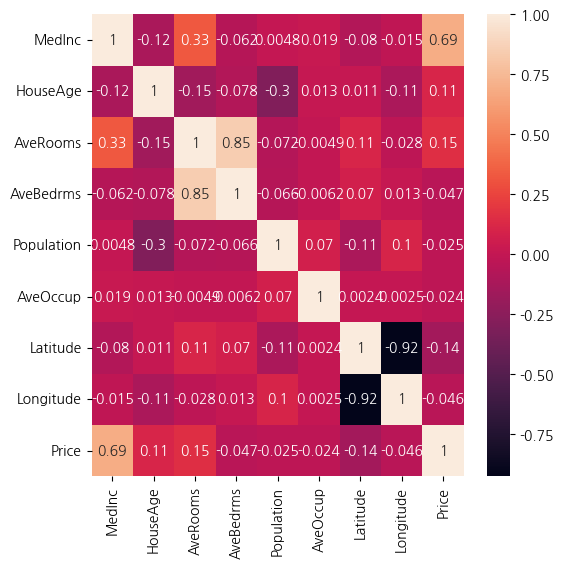

In [41]:
ccol = housing_df.columns
corr = housing_df[ccol].corr()

# 상관 계수 값에 대한 히트맵
# 매개변수 annot : 맵에 값 표시 여부 지정
# 매개변수 annto_kws : 표시되는 값에 대한 추가 옵션

plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True)

In [48]:
# 선형회귀 모델 구축

x = housing.data
y = housing.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=27)

lr = LinearRegression()
reg = lr.fit(x_train,y_train)


coef = reg.coef_
intercept = reg.intercept_
coef = pd.Series(coef, index=housing.feature_names)
coef.sort_values(ascending=False)

AveBedrms     7.978565e-01
MedInc        4.439470e-01
HouseAge      9.733379e-03
Population    1.590985e-07
AveOccup     -3.487238e-03
AveRooms     -1.200144e-01
Latitude     -4.230130e-01
Longitude    -4.365386e-01
dtype: float64

In [4]:
#fetch data이므로 온라인으로만 fetch가능
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')

cf = pd.read_csv('./data/data/california_dataset.csv')

x = cf.drop(['Price'],axis = 1)
y = cf['Price']

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=27)

In [6]:
from sklearn.linear_model import LinearRegression

lr  = LinearRegression()

In [7]:
reg = lr.fit(x_train,y_train)

In [8]:
def get_score(y_test, y_pred):
    """
    mse,rmse,r2 계산
    """
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_pred)

    return (mse,rmse,r2)

In [44]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = reg.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
y_pred = reg.predict(x_test)

mse, rmse, r2 = get_score(y_test, y_pred)

print(f'MSE : {mse:.3f},RMSE:{rmse:.3f},R2:{r2:.3f}'.format(mse,rmse,r2))

MSE : 0.542,RMSE:0.736,R2:0.589


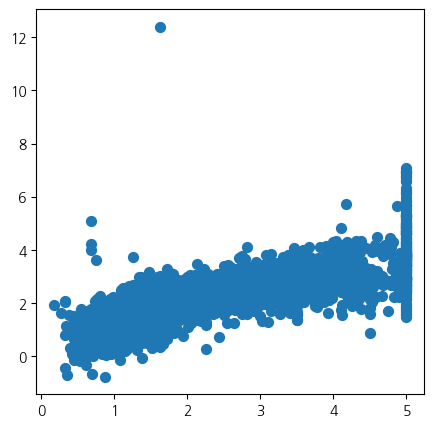

In [45]:
# 결과 시각화
y_pred = reg.predict(x_test)
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred, s= 50)